In [1]:
import pandas as pd
from src.config import TRANSFORMED_DATA_DIR

df = pd.read_csv(TRANSFORMED_DATA_DIR / "transformed_data_6h.csv")
df

,rides_t-672,rides_t-671,rides_t-670,rides_t-669,rides_t-668,rides_t-667,rides_t-666,rides_t-665,rides_t-664,rides_t-663,...,rides_t-7,rides_t-6,rides_t-5,rides_t-4,rides_t-3,rides_t-2,rides_t-1,pickup_hour,station_id,target
0,15,38,43,43,10,12,73,40,2,15,...,2,21,16,6,6,22,15,2022-01-01 00:00:00,HB101,8
1,38,43,43,10,12,73,40,2,15,50,...,21,16,6,6,22,15,8,2022-01-01 06:00:00,HB101,4
2,43,43,10,12,73,40,2,15,50,40,...,16,6,6,22,15,8,4,2022-01-01 12:00:00,HB101,4
3,43,10,12,73,40,2,15,50,40,2,...,6,6,22,15,8,4,4,2022-01-01 18:00:00,HB101,3
4,10,12,73,40,2,15,50,40,2,34,...,6,22,15,8,4,4,3,2022-01-02 00:00:00,HB101,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,5,1,5,13,9,3,13,19,9,3,...,0,10,10,5,3,4,12,2023-12-30 18:00:00,HB305,4
8756,1,5,13,9,3,13,19,9,3,16,...,10,10,5,3,4,12,4,2023-12-31 00:00:00,HB305,2
8757,5,13,9,3,13,19,9,3,16,21,...,10,5,3,4,12,4,2,2023-12-31 06:00:00,HB305,6
8758,13,9,3,13,19,9,3,16,21,20,...,5,3,4,12,4,2,6,2023-12-31 12:00:00,HB305,6


In [2]:
# Ensure the 'pickup_hour' column is in datetime format
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

# Split the data into training (2022) and testing (2023)
train_data = df[df['pickup_hour'].dt.year == 2022]
test_data = df[df['pickup_hour'].dt.year == 2023]

# Separate features (X) and target (Y)
X_train = train_data.drop(columns=['target'])
Y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
Y_test = test_data['target']

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4380, 674)
(4380,)
(4380, 674)
(4380,)


In [3]:
import numpy as np

class BaselineModelPreviousHour:

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass

    def predict(self, X_test: pd.DataFrame) -> np.array:
        return X_test["rides_t-1"]

In [4]:
model = BaselineModelPreviousHour()
predictions = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")

Mean Absolute Error (MAE): 12.9607


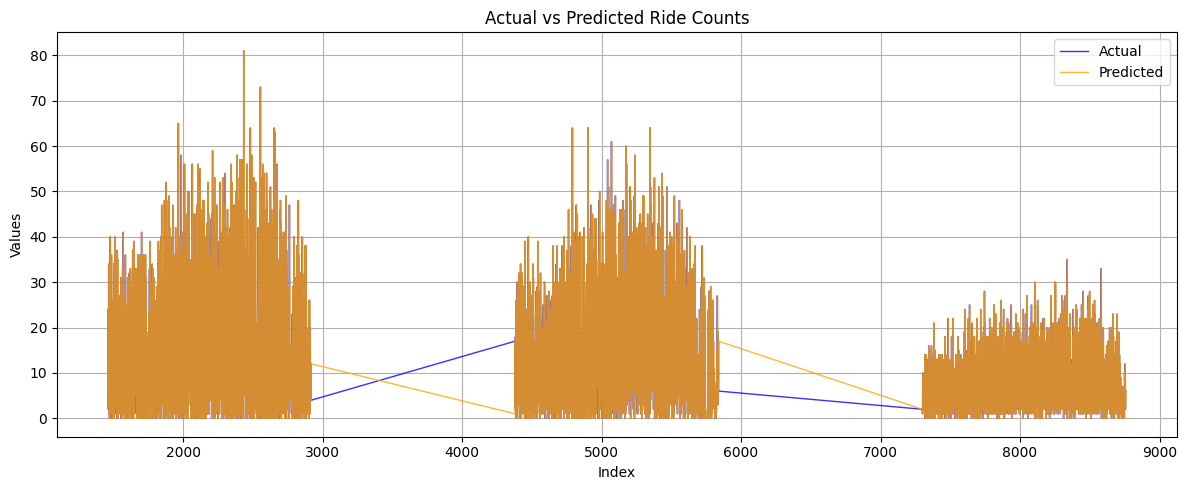

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot with reduced linewidth and transparency
plt.plot(Y_test.index, Y_test, label='Actual', color='blue', linewidth=1, alpha=0.8)
plt.plot(predictions.index, predictions, label='Predicted', color='orange', linewidth=1, alpha=0.8)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Ride Counts')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
